In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import diffimTests as dit

import warnings
warnings.filterwarnings('ignore')

Do 40x10 runs, each with 50 var sources with fluxes that ramp up from 200 to 2000.

Each run has the same 50 var source fluxes.

In [ ]:
n_runs = 10
fluxes = np.linspace(400., 2000., 40)
testResults1 = {}; testResults2 = {}; testResults3 = {}
for i, flux in enumerate(fluxes):
    print i, flux
    fl = flux #np.repeat(flux, 40)
    testResults1[i] = dit.multi.runMultiDiffimTests(varSourceFlux=fl, n_runs=n_runs, 
                                                    n_varSources=50,
                                                   templateNoNoise=True, skyLimited=True)
    testResults2[i] = dit.multi.runMultiDiffimTests(varSourceFlux=fl, n_runs=n_runs, 
                                                    n_varSources=50, 
                                                   templateNoNoise=False, skyLimited=True)
    testResults3[i] = dit.multi.runMultiDiffimTests(varSourceFlux=fl, n_runs=n_runs, 
                                                    n_varSources=50, 
                                                   templateNoNoise=False, skyLimited=False)

In [12]:
dit.dumpObjects((testResults1, testResults2, testResults3), "tmp4_pkl")

In [ ]:
testResults1, testResults2, testResults3 = dit.loadObjects('tmp4_pkl')

FN: 
ALstack           1.0
ALstack_decorr    3.4
SZOGY             1.0
ZOGY              1.1
dtype: float64
FP: 
ALstack           1.1
ALstack_decorr    1.0
SZOGY             0.8
ZOGY              1.3
dtype: float64
TP: 
ALstack           49.0
ALstack_decorr    46.6
SZOGY             49.0
ZOGY              48.9
dtype: float64


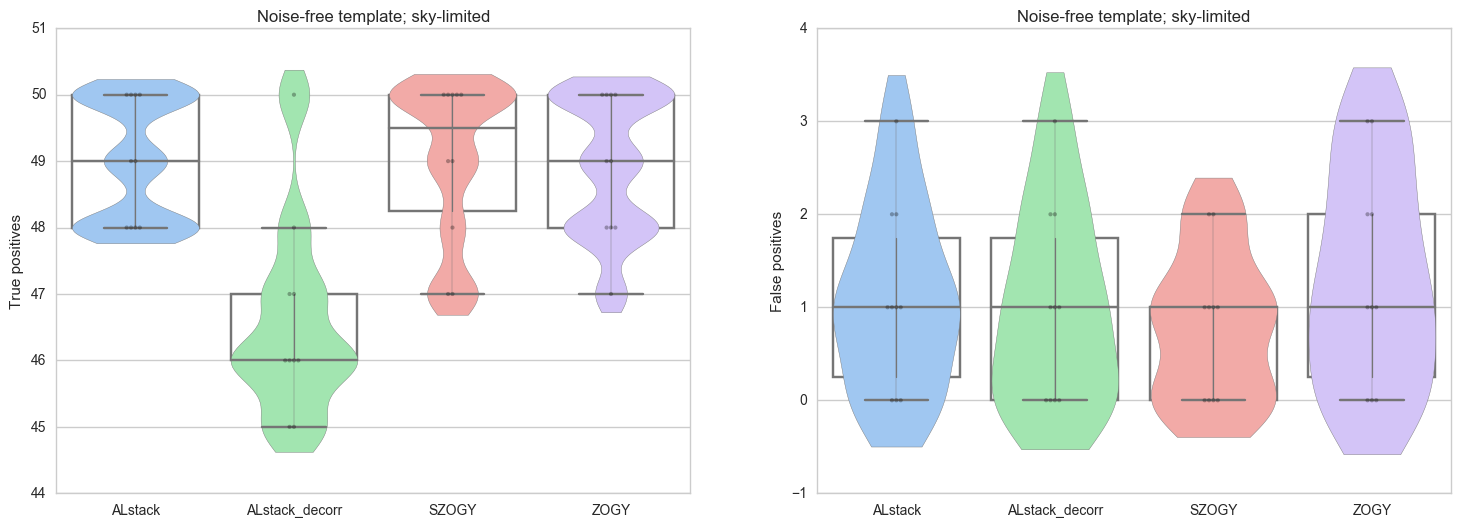

In [3]:
dit.multi.plotResults(testResults1[20], title='Noise-free template; sky-limited');

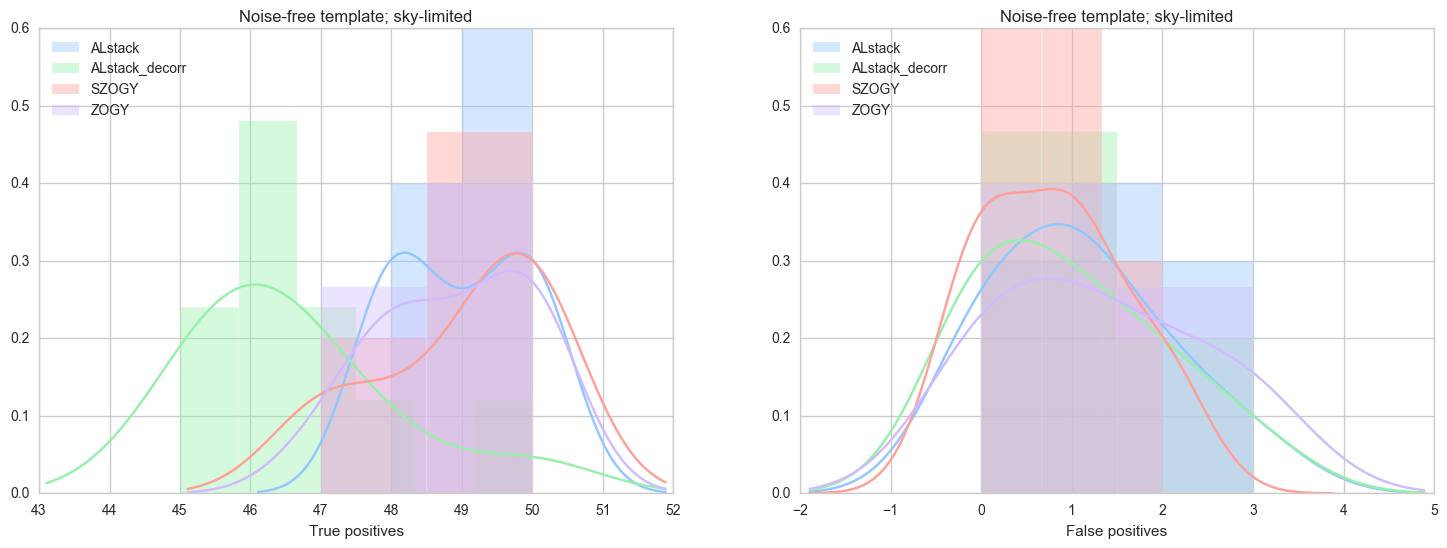

In [4]:
dit.multi.plotResults(testResults1[20], title='Noise-free template; sky-limited', asHist=True, doPrint=False);

Noise-free template; sky-limited :
AL:		13.3661654813 +/- 0.974985404668
AL(decorr):	13.3240653111 +/- 0.978876717061
ZOGY:		13.3224834344 +/- 0.970490014756


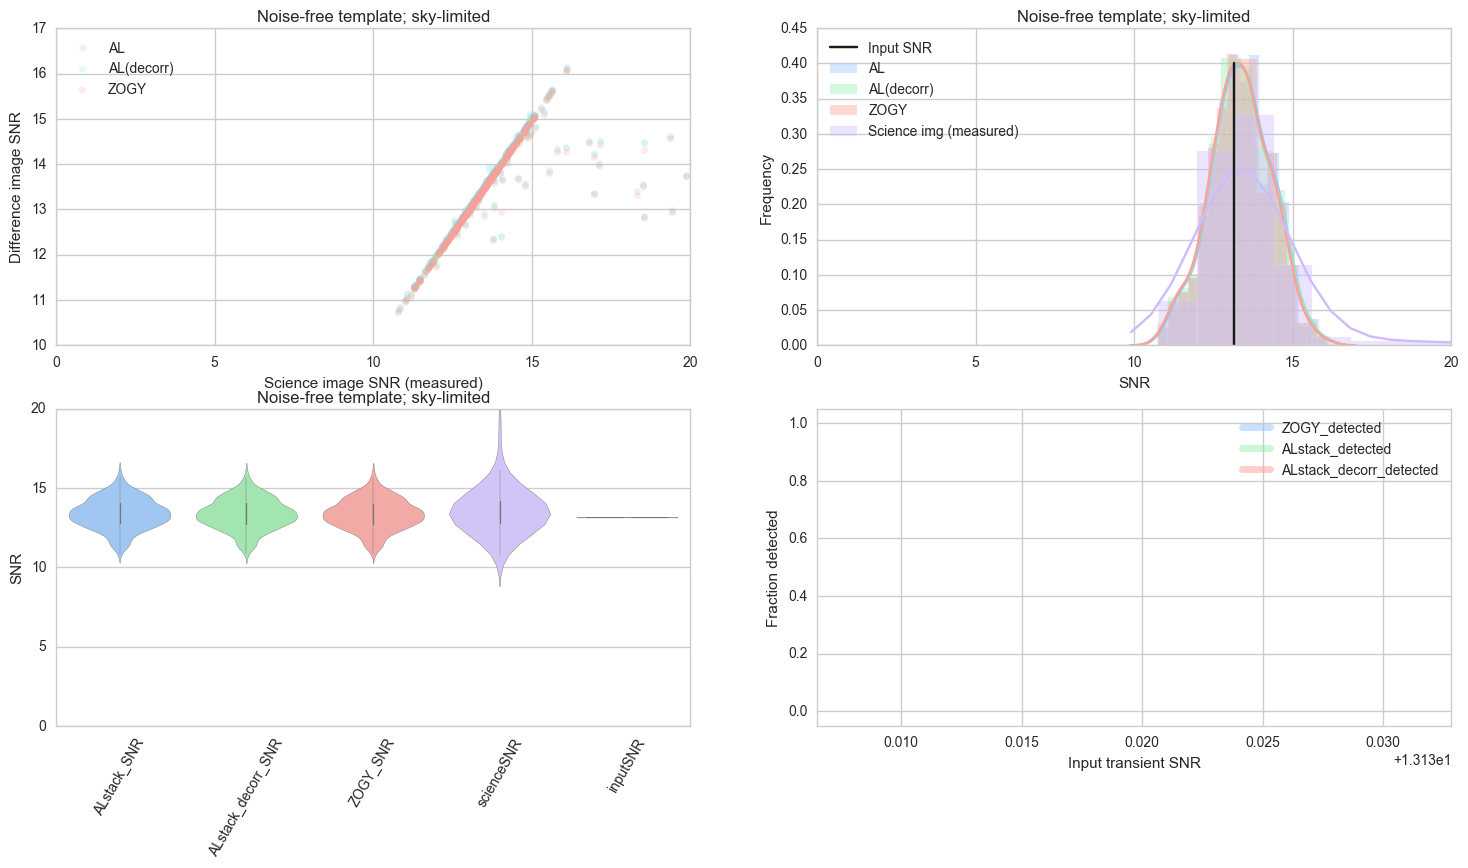

In [5]:
dit.multi.plotSnrResults(testResults1[30], title='Noise-free template; sky-limited');

In [6]:
import pandas as pd
tr = testResults1[0]
methods = ['ALstack', 'ZOGY', 'SZOGY', 'ALstack_decorr']
FN = pd.DataFrame({key: np.array([t['result'][key]['FN'] for t in tr]) for key in methods}).mean()
FP = pd.DataFrame({key: np.array([t['result'][key]['FP'] for t in tr]) for key in methods}).mean()
TP = pd.DataFrame({key: np.array([t['result'][key]['TP'] for t in tr]) for key in methods}).mean()

TP['scienceSNR'] = tr[0]['scienceSNR']
TP

ALstack           1.700000
ALstack_decorr    1.700000
SZOGY             1.600000
ZOGY              1.600000
scienceSNR        3.225157
dtype: float64

In [7]:
import pandas as pd
methods = ['ALstack', 'ZOGY', 'SZOGY', 'ALstack_decorr']
TP1 = []; FP1 = []; FN1 = []
for i, tr in enumerate(testResults1):
    tr = testResults1[i]
    FN1.append(pd.DataFrame({key: np.array([t['result'][key]['FN'] for t in tr]) for key in methods}).mean())
    FN1[i]['scienceSNR'] = tr[0]['scienceSNR']
    FP1.append(pd.DataFrame({key: np.array([t['result'][key]['FP'] for t in tr]) for key in methods}).mean())
    FP1[i]['scienceSNR'] = tr[0]['scienceSNR']
    TP1.append(pd.DataFrame({key: np.array([t['result'][key]['TP'] for t in tr]) for key in methods}).mean())
    TP1[i]['scienceSNR'] = tr[0]['scienceSNR']

print len(TP1)
TP1 = pd.concat(TP1, axis=1).transpose()
FP1 = pd.concat(FP1, axis=1).transpose()
FN1 = pd.concat(FN1, axis=1).transpose()
print TP1.shape
#dit.sizeme(TP1.head())

40
(40, 5)


In [8]:
import pandas as pd
methods = ['ALstack', 'ZOGY', 'SZOGY', 'ALstack_decorr']
TP2 = []; FP2 = []; FN2 = []
for i, tr in enumerate(testResults2):
    tr = testResults2[i]
    FN2.append(pd.DataFrame({key: np.array([t['result'][key]['FN'] for t in tr]) for key in methods}).mean())
    FN2[i]['scienceSNR'] = tr[0]['scienceSNR']
    FP2.append(pd.DataFrame({key: np.array([t['result'][key]['FP'] for t in tr]) for key in methods}).mean())
    FP2[i]['scienceSNR'] = tr[0]['scienceSNR']
    TP2.append(pd.DataFrame({key: np.array([t['result'][key]['TP'] for t in tr]) for key in methods}).mean())
    TP2[i]['scienceSNR'] = tr[0]['scienceSNR']

print len(TP2)
TP2 = pd.concat(TP2, axis=1).transpose()
FP2 = pd.concat(FP2, axis=1).transpose()
FN2 = pd.concat(FN2, axis=1).transpose()
print TP2.shape
#dit.sizeme(TP1.head())

40
(40, 5)


In [9]:
import pandas as pd
methods = ['ALstack', 'ZOGY', 'SZOGY', 'ALstack_decorr']
TP3 = []; FP3 = []; FN3 = []
for i, tr in enumerate(testResults3):
    tr = testResults3[i]
    FN3.append(pd.DataFrame({key: np.array([t['result'][key]['FN'] for t in tr]) for key in methods}).mean())
    FN3[i]['scienceSNR'] = tr[0]['scienceSNR']
    FP3.append(pd.DataFrame({key: np.array([t['result'][key]['FP'] for t in tr]) for key in methods}).mean())
    FP3[i]['scienceSNR'] = tr[0]['scienceSNR']
    TP3.append(pd.DataFrame({key: np.array([t['result'][key]['TP'] for t in tr]) for key in methods}).mean())
    TP3[i]['scienceSNR'] = tr[0]['scienceSNR']

print len(TP3)
TP3 = pd.concat(TP3, axis=1).transpose()
FP3 = pd.concat(FP3, axis=1).transpose()
FN3 = pd.concat(FN3, axis=1).transpose()
print TP3.shape
#dit.sizeme(TP1.head())

40
(40, 5)


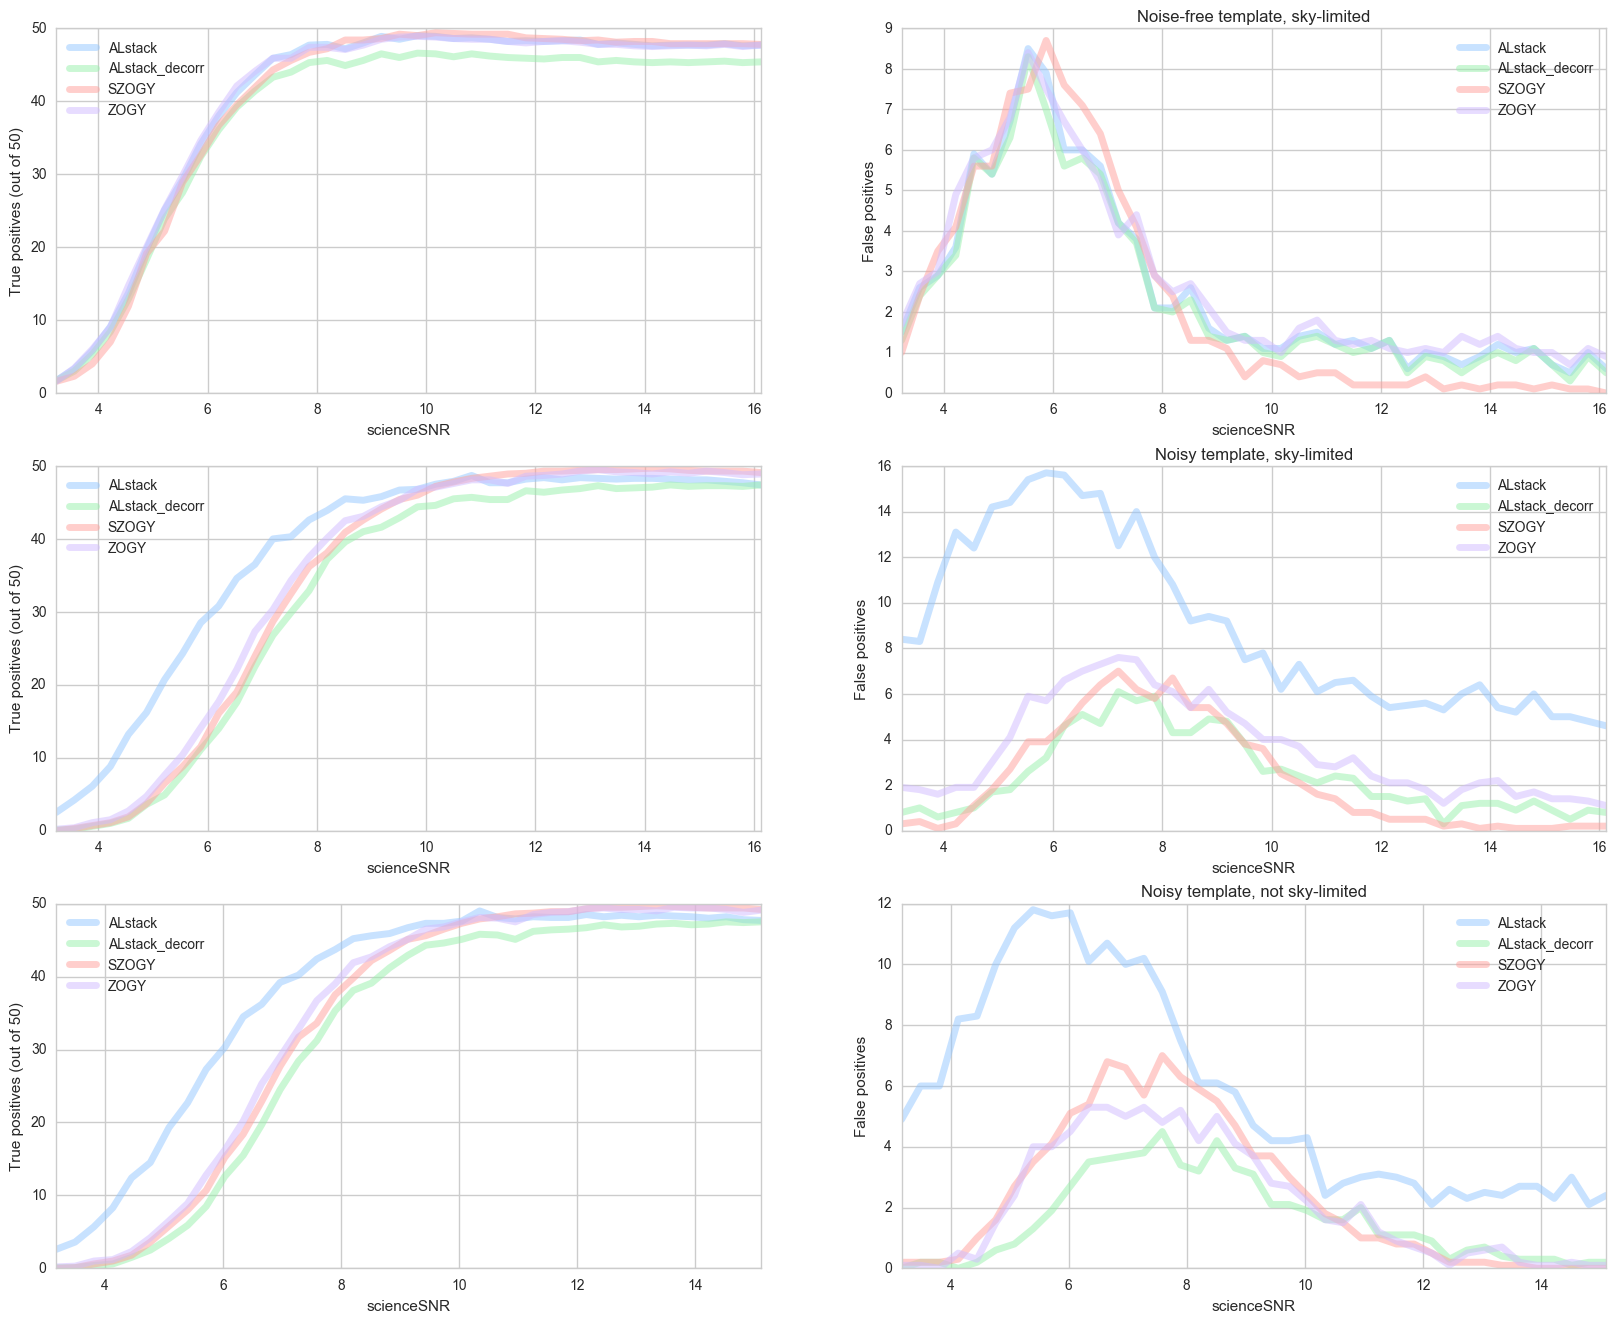

In [10]:
plt.subplots(3, 2, figsize=(20, 16))
ax = plt.subplot(321)    
TP1.plot(x='scienceSNR', alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('True positives (out of 50)')
ax = plt.subplot(322)    
FP1.plot(x='scienceSNR', alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('False positives')
ax.set_title('Noise-free template, sky-limited')

ax = plt.subplot(323)    
TP2.plot(x='scienceSNR', alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('True positives (out of 50)')
ax = plt.subplot(324)    
FP2.plot(x='scienceSNR', alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('False positives')
ax.set_title('Noisy template, sky-limited')

ax = plt.subplot(325)    
TP3.plot(x='scienceSNR', alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('True positives (out of 50)')
ax = plt.subplot(326)    
FP3.plot(x='scienceSNR', alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('False positives')
ax.set_title('Noisy template, not sky-limited')

Calculate precision and recall:
    
https://en.wikipedia.org/wiki/Precision_and_recall

(0, 1)

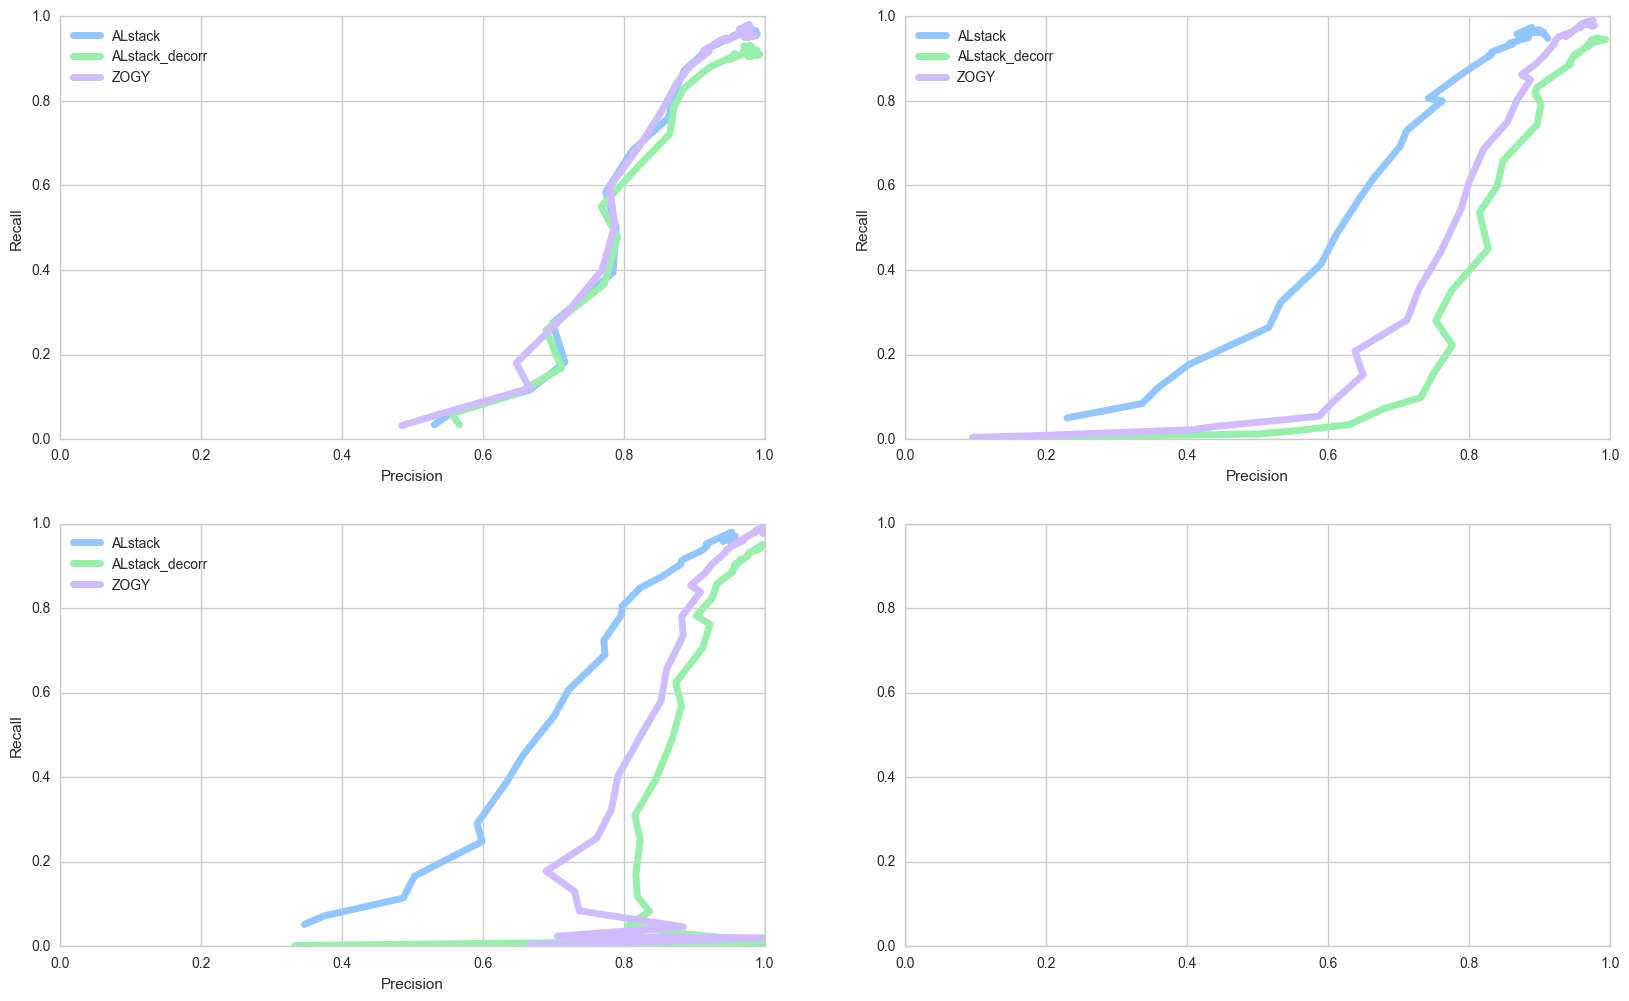

In [40]:
plt.subplots(2, 2, figsize=(20, 12))

precision1 = TP1.copy()
precision1[['ALstack','ALstack_decorr','SZOGY','ZOGY']] /= \
    (TP1[['ALstack','ALstack_decorr','SZOGY','ZOGY']] + FP1[['ALstack','ALstack_decorr','SZOGY','ZOGY']])
recall1 = TP1.copy()
recall1[['ALstack','ALstack_decorr','SZOGY','ZOGY']] /= 50.
ax = plt.subplot(221)    
plt.plot(precision1.ALstack, recall1.ALstack, lw=5, label='ALstack')
plt.plot(precision1.ALstack_decorr, recall1.ALstack_decorr, color='g', lw=5, label='ALstack_decorr')
plt.plot(precision1.ZOGY, recall1.ZOGY, color='m', lw=5, label='ZOGY')
plt.legend(loc='upper left')
plt.xlabel('Precision'); plt.ylabel('Recall')
plt.xlim(0, 1); plt.ylim(0, 1)

precision2 = TP2.copy()
precision2[['ALstack','ALstack_decorr','SZOGY','ZOGY']] /= \
    (TP2[['ALstack','ALstack_decorr','SZOGY','ZOGY']] + FP2[['ALstack','ALstack_decorr','SZOGY','ZOGY']])
recall2 = TP2.copy()
recall2[['ALstack','ALstack_decorr','SZOGY','ZOGY']] /= 50.
ax = plt.subplot(222)    
plt.plot(precision2.ALstack, recall2.ALstack, lw=5, label='ALstack')
plt.plot(precision2.ALstack_decorr, recall2.ALstack_decorr, color='g', lw=5, label='ALstack_decorr')
plt.plot(precision2.ZOGY, recall2.ZOGY, color='m', lw=5, label='ZOGY')
plt.legend(loc='upper left')
plt.xlabel('Precision'); plt.ylabel('Recall')
plt.xlim(0, 1); plt.ylim(0, 1)

precision3 = TP3.copy()
precision3[['ALstack','ALstack_decorr','SZOGY','ZOGY']] /= \
    (TP3[['ALstack','ALstack_decorr','SZOGY','ZOGY']] + FP3[['ALstack','ALstack_decorr','SZOGY','ZOGY']])
recall3 = TP3.copy()
recall3[['ALstack','ALstack_decorr','SZOGY','ZOGY']] /= 50.
ax = plt.subplot(223)    
plt.plot(precision3.ALstack, recall3.ALstack, lw=5, label='ALstack')
plt.plot(precision3.ALstack_decorr, recall3.ALstack_decorr, color='g', lw=5, label='ALstack_decorr')
plt.plot(precision3.ZOGY, recall3.ZOGY, color='m', lw=5, label='ZOGY')
plt.legend(loc='upper left')
plt.xlabel('Precision'); plt.ylabel('Recall')
plt.xlim(0, 1); plt.ylim(0, 1)